In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/accounts/grad/huz4/Desktop/STAT222/train_data.csv')

X = df.drop(['price'], axis =1)
Y = df['price']

In [3]:
X.shape

(2369088, 60)

# Feature analysis and selection 

As shown in the EDA result, our training data set contain may missing values, the perpuse of this notebook is to proceed sequentially through features with missing values,
and decide whether we should drop them or do some imputuation.

**Note: this might be the most important part for the zillow project.**


**Table for feature discription**



**airconditioningtypeid** : Type of cooling system present in the home (if any) 

**architecturalstyletypeid** : Architectural style of the home (i.e. ranch, colonial, split-level, etc…) 

**basementsqft** :  Finished living area below or partially below ground level 

**bathroomcnt** : Number of bathrooms in home including fractional bathrooms 

**bedroomcnt** : Number of bedrooms in home 

**buildingqualitytypeid** :  Overall assessment of condition of the building from best (lowest) to worst (highest)

**buildingclasstypeid** : The building framing type (steel frame, wood frame, concrete/brick)  

**calculatedbathnbr** :  Number of bathrooms in home including fractional bathroom

**decktypeid** : Type of deck (if any) present on parcel 

**threequarterbathnbr** :  Number of 3/4 bathrooms in house (shower + sink + toilet) 

**finishedfloor1squarefeet** :  Size of the finished living area on the first (entry) floor of the home  

**calculatedfinishedsquarefeet** : Calculated total finished living area of the home   

**finishedsquarefeet6** : Base unfinished and finished area  

**finishedsquarefeet12** : Finished living area  

**finishedsquarefeet13** : Perimeter  living area  

**finishedsquarefeet15** : Total area  

**finishedsquarefeet50** : Size of the finished living area on the first (entry) floor of the home  

**fips** :  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details  

**fireplacecnt** :  Number of fireplaces in a home (if any)}  

**fireplaceflag** :  Is a fireplace present in this home   

**fullbathcnt** :  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home  

**garagecarcnt** :  Total number of garages on the lot including an attached garage  

**garagetotalsqft** :  Total number of square feet of all garages on lot including an attached garage  

**hashottuborspa** :  Does the home have a hot tub or spa  

**heatingorsystemtypeid** :  Type of home heating system  

**latitude** :  Latitude of the middle of the parcel multiplied by 10e6  

**longitude** :  Longitude of the middle of the parcel multiplied by 10e6  

**lotsizesquarefeet** :  Area of the lot in square feet  

**numberofstories** :  Number of stories or levels the home has  

**parcelid** :  Unique identifier for parcels (lots)   

**poolcnt** :  Number of pools on the lot (if any)  

**poolsizesum** :  Total square footage of all pools on property  

**pooltypeid10** :  Spa or Hot Tub  

**pooltypeid2** :  Pool with Spa/Hot Tub  

**pooltypeid7** :  Pool without hot tub  

**propertycountylandusecode** :  County land use code i.e. it**s zoning at the county level  

**propertylandusetypeid** :  Type of land use the property is zoned for  

**propertyzoningdesc** :  Description of the allowed land uses (zoning) for that property  

**rawcensustractandblock** : Census tract and block ID combined - also contains blockgroup assignment by extension  

**censustractandblock** :  Census tract and block ID combined - also contains blockgroup assignment by extension  

**regionidcounty** : County in which the property is located  

**regionidcity** :  City in which the property is located (if any)  

**regionidzip** :   City in which the property is located (if any)  

**regionidneighborhood** : Neighborhood in which the property is located  

**roomcnt** :  Total number of rooms in the principal residence  

**storytypeid** :  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.  

**typeconstructiontypeid** :  What type of construction material was used to construct the home  

**unitcnt** :  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)  

**yardbuildingsqft17** : Patio in  yard  

**yardbuildingsqft26** : Storage shed/building in yard  

**yearbuilt** :  The Year the principal residence was built   

**taxvaluedollarcnt** : The total tax assessed value of the parcel  

**structuretaxvaluedollarcnt** : The assessed value of the built structure on the parcel  

**landtaxvaluedollarcnt** : The assessed value of the land area of the parcel  

**taxamount** : The total property tax assessed for that assessment year}  

**assessmentyear** : The year of the property tax assessment   

**taxdelinquencyflag** : Property taxes for this parcel are past due as of 2015  

**taxdelinquencyyear** : Year for which the unpaid propert taxes were due   


### Features with one unique value

In [5]:
feature_unique_val = []
for i in X.columns :
    num_uniques = len(X[i].unique())
    # remove the count for NA
    if X[i].isnull().sum() != 0:
        num_uniques -= 1
    if num_uniques == 1:
        feature_unique_val.append(i)
print(feature_unique_val)

['decktypeid', 'hashottuborspa', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'fireplaceflag', 'taxdelinquencyflag']


All those features above have a unique vaule other than missing values.

## Drop features 1.1

In [6]:
feature_possible_val = []
for i in X.columns :
    num_val = len(X[i].unique())
    feature_possible_val.append(num_val)

In [7]:
possible_val = pd.DataFrame({'Features' : list(X.columns), 'Number of possible Values': feature_possible_val})
possible_val

,Features,Number of possible Values
0,parcelid,2369088
1,airconditioningtypeid,8
2,architecturalstyletypeid,9
3,basementsqft,661
4,bathroomcnt,39
5,bedroomcnt,24
6,buildingclasstypeid,6
7,buildingqualitytypeid,13
8,calculatedbathnbr,37
9,decktypeid,2


In [8]:
all_data_na = (X.isnull().sum() / len(X)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data[:35]

,Missing Ratio
storytypeid,99.944662
basementsqft,99.944493
yardbuildingsqft26,99.911907
finishedsquarefeet13,99.883584
fireplaceflag,99.824827
architecturalstyletypeid,99.796251
typeconstructiontypeid,99.772993
buildingclasstypeid,99.576757
pooltypeid10,99.427121
decktypeid,99.414163


**finishedsquarefeet13**: Data description says 'Perimeter Living Area'. Over 99% of the dataset is missing values.

**finishedsquarefeet15**: Data description says 'Total area'. Over 96% of the dataset is missing values.

**finishedfloor1squarefeet**: Over 92% of the dataset is missing values.

**finishedsquarefeet50**: Over 92% of the dataset is missing values.

**storytypeid**: Over 99% of the dataset is missing values.

**buildingclasstypeid**: With over 99% of the dataset missing, imputing won't contribute any new information.

**architecturalstyletypeid**: Over 99% of the dataset is missing values.

**typeconstructiontypeid**: Over 99% of the dataset is missing values.

**finishedsquarefeet6**: Data description states 'Base unfinished and finished area'. However, with over 99% of data missing, feature is dropped.

**numberofstories**: With over 76% of the missing values and no one value dominating the variable distribution, it is impractical to impute and introduce incorrect information.

**rawcensustractandblock, censustractandblock**: With almost 95k unique values, it is not reasonable to include those variables into model due to the lack of interperbility.

**assessmentyear**: Dropping as the variable has only two unique value in the dataset.

**parcelid**: This variable is not available when trying to predict target variable price

**basementsqft, yardbuildingsqft26**: Dropping due to over 96% of data missing.

**latitude, longitude**: Dropping due to replacement by 'dist_to_dtla' and 'dist_to_ocean'


### Duplicate Features

There are many features represents the same thing, and we can oberve a high correlation based on EDA, we will remove those duplicated features.

**pooltypeid10, hashottuborspa**: Duplicate information is present in pooltypeid2 feature.

**pooltypeid7**: Data description states 'Pool without Hot Tub', duplicate information is present in pooltypeid2 feature which is boolean for 'Pool with Spa/Hot Tub'

**fireplaceflag**: Duplicate information is present in fireplacecnt feature with fireplaceflag having a higher missing ratio.

**threequarterbathnbr, calculatedbathnbr, fullbathcnt**: Duplicate information is present in bathroomcnt which has a lower missing ratio

**finishedsquarefeet12**: Duplicate information in calculatedfinishedsquarefeet.

**taxvaluedollarcnt**: Duplicate information from the sum of structuretaxvaluedollarcnt and landtaxvaluedollarcnt

**roomcnt**: Duplicate information from bedroomcnt and roomcnt shows inconsistent data with majority of properties having 0 rooms in the principal residence

**propertyzoningdesc, propertycountylandusecode**: propertylandusetypeid already provides similar information. In addition, this variable has over 2300 unique values - drastically increasing dataset cardinality.

**regionidneighborhood, regionidzip, regionidcity**: With over 60% of the dataset missing values and 500+ unique values, there are better region based features such as regionidcounty, latitude, longitude to obtain this information

**taxdelinquencyyear**: Given the high proportion of missing data (over 97%) and taxdelinquencyflag providing similar information, the information gain from years is low.

### Drop unnecessary features

In [133]:
# do a 80,20 split on data, set a seed
#import random
#random.seed(222)
#from sklearn.model_selection import train_test_split

#train_df, test_df = train_test_split(df, test_size=0.2)

In [134]:
#X = train_df.drop(['price'], axis =1)
#Y = train_df['price']

In [10]:
drop_feat = ["finishedsquarefeet13", "finishedsquarefeet15", "finishedfloor1squarefeet", "finishedsquarefeet50",
             "storytypeid", "architecturalstyletypeid", "buildingclasstypeid", "typeconstructiontypeid", "finishedsquarefeet6",
             "pooltypeid10", "pooltypeid7", "hashottuborspa", "fireplaceflag", "threequarterbathnbr", "calculatedbathnbr",
             "fullbathcnt", "numberofstories", "rawcensustractandblock", "censustractandblock",
             "finishedsquarefeet12", "taxvaluedollarcnt", "taxamount", "assessmentyear", "roomcnt",
             "propertyzoningdesc", "regionidneighborhood", "regionidzip", "taxdelinquencyyear",
             "propertycountylandusecode", "regionidcity", "parcelid", "basementsqft", "yardbuildingsqft26", "latitude", "longitude"
            ]

In [11]:
X_temp = X.iloc[:1000 : ]

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
class DropFeature(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def drop(self,X):
        result = X.drop(self.features_to_drop, axis = 1)
        return result
# test function
feature_dropper = DropFeature(features_to_drop= drop_feat)
test_temp = feature_dropper.drop(X_temp)
test_temp.columns

In [11]:
X = X.drop(columns = drop_feat, axis =1)

## Imputation 

In [12]:
list(X.columns)

['airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'decktypeid',
 'calculatedfinishedsquarefeet',
 'fips',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid2',
 'propertylandusetypeid',
 'regionidcounty',
 'unitcnt',
 'yardbuildingsqft17',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxdelinquencyflag',
 'dist_to_dtla',
 'dist_to_ocean']

### Imputation with 0
We impute some features by 0 since it is reasonable to assume we have 0 for those features.

In [13]:
# if a property has NaN fireplaces, we assume it has 0 fireplaces
X['fireplacecnt'] = X['fireplacecnt'].fillna(0)

In [14]:
# if a property has NaN pools, we assume the property has 0 pools
X['poolcnt'] = X['poolcnt'].fillna(0)

In [15]:
# if a property has NaN yardbuildingsqft17, 
# we assume the property has 0 yardbuildingsqft17
X['yardbuildingsqft17'] = X['yardbuildingsqft17'].fillna(0)

In [16]:
# if a property has NaN total pool sqft, 
# we assume the property has 0 pool sqft
X['poolsizesum'] = X['poolsizesum'].fillna(0)

In [17]:
# if a property has NaN garages, we assume it has 0 garages
X['garagecarcnt'] = X['garagecarcnt'].fillna(0)

In [18]:
# if a property has NaN garage sqft, we assume the garage has 0 sqft
X['garagetotalsqft'] = X['garagetotalsqft'].fillna(0)

In [19]:
# if a property has NaN pooltypeid2, 
# we assume the property has not hot tub in pool
X['pooltypeid2'] = X['pooltypeid2'].fillna(0)

In [20]:
# if a property has NaN garagedecktypeid, 
# we assume the property has 0 deck
X['decktypeid'] = X['decktypeid'].fillna(0)

In [21]:
# if a property has NaN taxdelinquencyflag, 
# we assume the property has 0 taxdelinquencyflag
X['taxdelinquencyflag'] = X['taxdelinquencyflag'].fillna(0)

In [22]:
#remaining variables after removing imputation with 0
# why are we doing this?
im_0 = ['fireplacecnt','poolcnt','yardbuildingsqft17',
        'poolsizesum','garagecarcnt','garagetotalsqft',
        'pooltypeid2','decktypeid','taxdelinquencyflag']
remain = X.drop(columns = im_0, axis =1)

In [23]:
list(remain.columns)

['airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'fips',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcounty',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'dist_to_dtla',
 'dist_to_ocean']

In [24]:
remain.head(10)

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,lotsizesquarefeet,propertylandusetypeid,regionidcounty,unitcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,dist_to_dtla,dist_to_ocean
0,NaN,1.0,2.0,4.0,714.0,6037.0,7.0,4570.0,261.0,3101.0,1.0,1950.0,17031.0,31246.0,4.569025,47.632583
1,NaN,3.0,3.0,8.0,2273.0,6037.0,2.0,21297.0,261.0,3101.0,1.0,1942.0,110301.0,45334.0,12.182530,60.417559
2,NaN,0.0,0.0,NaN,1248.0,6037.0,NaN,NaN,263.0,3101.0,NaN,1988.0,NaN,NaN,39.623060,64.901019
3,1.0,2.0,3.0,6.0,1052.0,6037.0,2.0,4511.0,261.0,3101.0,1.0,1923.0,181277.0,251624.0,10.719507,60.804350
4,1.0,3.0,3.0,7.0,1585.0,6037.0,2.0,552063.0,266.0,3101.0,1.0,1974.0,195361.0,129321.0,11.489197,1.863391
5,1.0,2.0,3.0,8.0,1807.0,6037.0,2.0,11400.0,261.0,3101.0,1.0,1959.0,119000.0,476000.0,22.069354,44.215884
6,1.0,3.0,4.0,8.0,2933.0,6037.0,2.0,8978.0,261.0,3101.0,1.0,1988.0,303117.0,225994.0,26.428310,57.775231
7,1.0,2.0,2.0,8.0,996.0,6037.0,2.0,19861.0,266.0,3101.0,1.0,1987.0,112117.0,28055.0,7.096641,54.298320
8,NaN,1.0,3.0,4.0,1106.0,6037.0,7.0,3818.0,261.0,3101.0,1.0,1950.0,26072.0,11158.0,20.998333,6.946331
9,NaN,1.0,1.0,7.0,890.0,6037.0,NaN,NaN,266.0,3101.0,1.0,2008.0,424568.0,103553.0,0.846569,17.019783


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

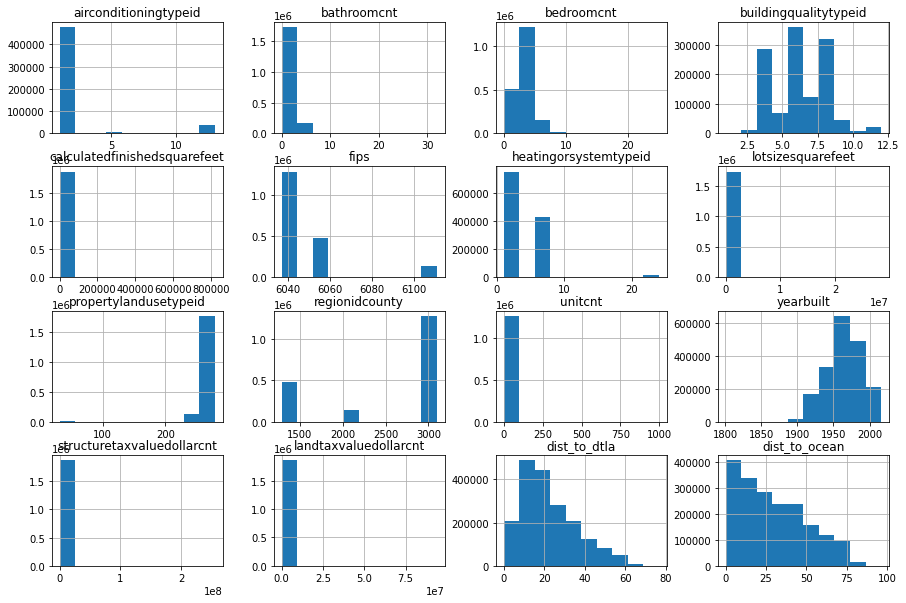

In [29]:
plt.subplots_adjust(wspace=0.2, hspace=1)
remain.hist(layout=(4,4),figsize=(15,10))
plt.show

### Plot Zero-Imputed Features
##### Didn't plot 'yardbuildingsqft17', 'pooltypeid2', 'decktypeid', or 'taxdelinquencyflag', since the plots were uninformative

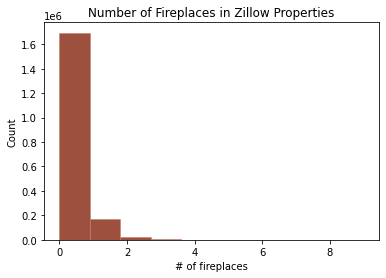

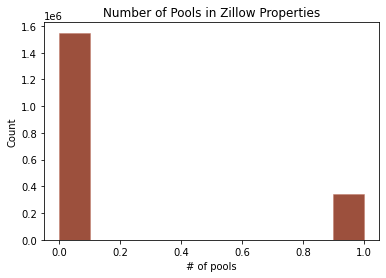

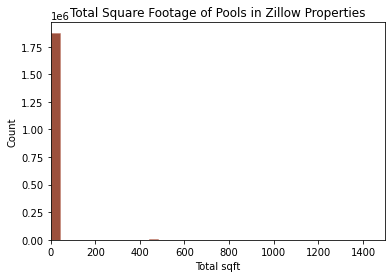

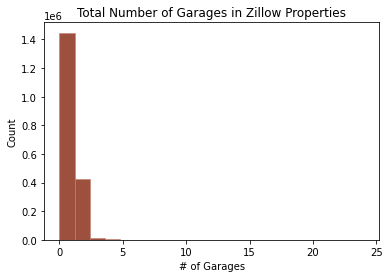

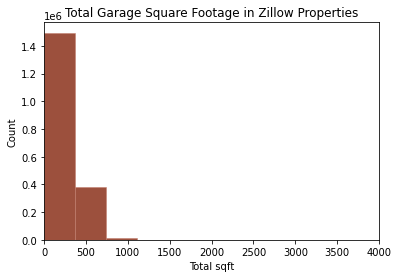

In [30]:

# plot fireplacecnt
plt.hist(X['fireplacecnt'], bins=10, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Number of Fireplaces in Zillow Properties') 
plt.xlabel('# of fireplaces') 
plt.ylabel('Count') 
plt.show()

# plot poolcnt
plt.hist(X['poolcnt'], bins=10, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Number of Pools in Zillow Properties') 
plt.xlabel('# of pools') 
plt.ylabel('Count') 
plt.show()

# plot poolsizesum
plt.hist(X['poolsizesum'], bins=100, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,1500])
plt.title('Total Square Footage of Pools in Zillow Properties') 
plt.xlabel('Total sqft') 
plt.ylabel('Count') 
plt.show()

# plot garagecarcnt
plt.hist(X['garagecarcnt'], bins=20, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Total Number of Garages in Zillow Properties') 
plt.xlabel('# of Garages') 
plt.ylabel('Count') 
plt.show()

# plot garagetotalsqft
plt.hist(X['garagetotalsqft'], bins=20, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,4000])
plt.title('Total Garage Square Footage in Zillow Properties') 
plt.xlabel('Total sqft') 
plt.ylabel('Count') 
plt.show()

#### Correlation of Zero-Imputed Features with Price 

/var/folders/hd/l3cc346x2v93nv8mpvg27r400000gn/T/ipykernel_6031/2809097503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Price"] = Y
/var/folders/hd/l3cc346x2v93nv8mpvg27r400000gn/T/ipykernel_6031/2809097503.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = temp_df.corr()


<AxesSubplot: >

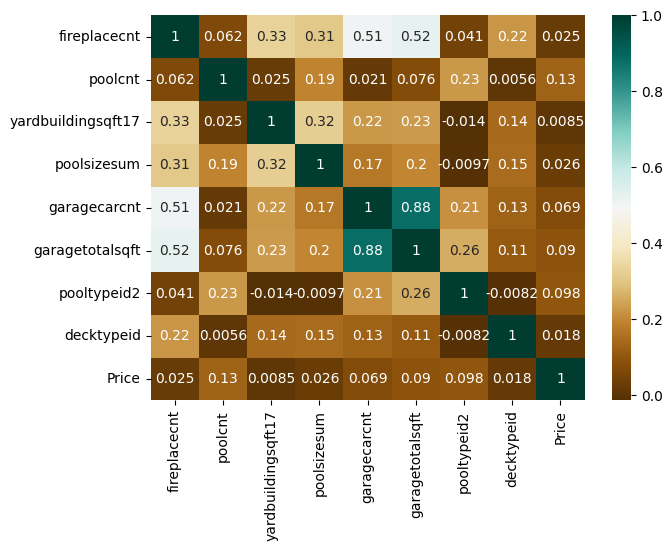

In [53]:
impute_0_vars_df = X[['fireplacecnt','poolcnt','yardbuildingsqft17',
        'poolsizesum','garagecarcnt','garagetotalsqft',
        'pooltypeid2','decktypeid','taxdelinquencyflag']]
impute_0_vars_df["Price"] = Y

correlation = impute_0_vars_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, cmap='BrBG', annot=True)

### Imputation with mode

We can impute some features by their mode since the majority of some feature's distribution has some specific value

In [25]:
ac = X['airconditioningtypeid']
ac = ac.dropna()

In [26]:
# we have 520658 non-NA values in airconditiontypeid, and most of them are in type1
# it is reasonable to impute this feature by its mode
ac.shape

(651842,)

**Mode for airconditioningtypeid**

In [27]:
from scipy import stats as st
print(st.mode(ac))

ModeResult(mode=array([1.]), count=array([595120]))


**Mode for heatingorsystemtypeid**

In [28]:
heatingorsystemtypeid = X['heatingorsystemtypeid']
heatingorsystemtypeid = heatingorsystemtypeid.dropna()

In [29]:
heatingorsystemtypeid.shape

(1492759,)

In [30]:
# similarily, it is reasonable to impute NAs by mode for heatingorsystemtypeid
print(st.mode(heatingorsystemtypeid))

ModeResult(mode=array([2.]), count=array([934433]))


**Mode for unitcnt**

In [31]:
unitcnt = X['unitcnt']
unitcnt = unitcnt.dropna()
unitcnt.shape

(1581087,)

In [32]:
# again, the majorty of non-NA values is 1, it is reasonable to impute unitcnt by its mode
print(st.mode(unitcnt))

ModeResult(mode=array([1.]), count=array([1424731]))


For **fips, propertylandtypeid, regionidcounty** and **yearbuilt**, these features have low number of missing data it is reasonable to impute them by mode.


### Imputation with median

For some features, it is more reasonable to impute it by the median. The 50th percentile can represent those features to best.

We will impute following features by their meidan

**buildingqualitytypeid, lotsizesquarefeet, bathroomcnt, bedroomcnt**

**calculatedfinishedsquarefeet, structuretaxvaluedollarcnt, landtaxvaluedollarcnt**

## Impute features

In [33]:
df =X.isnull().sum(axis =0)
df.columns=['features','miss_count']
df

airconditioningtypeid           1717246
bathroomcnt                           0
bedroomcnt                            0
buildingqualitytypeid            818655
decktypeid                            0
calculatedfinishedsquarefeet      25344
fips                                  0
fireplacecnt                          0
garagecarcnt                          0
garagetotalsqft                       0
heatingorsystemtypeid            876329
lotsizesquarefeet                205632
poolcnt                               0
poolsizesum                           0
pooltypeid2                           0
propertylandusetypeid                 0
regionidcounty                        0
unitcnt                          788001
yardbuildingsqft17                    0
yearbuilt                         28074
structuretaxvaluedollarcnt        23957
landtaxvaluedollarcnt             36346
taxdelinquencyflag                    0
dist_to_dtla                          0
dist_to_ocean                         0


In [34]:
# Impute 0
impute_0_vars = ["yardbuildingsqft17", "fireplacecnt", "poolcnt", "garagecarcnt", "garagetotalsqft",
                 "pooltypeid2", "poolsizesum", "decktypeid"]

# Impute mode
impute_mode_vars = ["airconditioningtypeid", "heatingorsystemtypeid", "unitcnt", "fips", 
                    "propertylandusetypeid", "regionidcounty", "yearbuilt"] 

# Impute median 
impute_median_vars = ["buildingqualitytypeid", "lotsizesquarefeet", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                      "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt"]

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [36]:
imputer_mode = SimpleImputer( strategy='most_frequent')
imputer_median = SimpleImputer( strategy='median')

In [37]:
X[impute_mode_vars]

,airconditioningtypeid,heatingorsystemtypeid,unitcnt,fips,propertylandusetypeid,regionidcounty,yearbuilt
0,NaN,7.0,1.0,6037.0,261.0,3101.0,1950.0
1,NaN,2.0,1.0,6037.0,261.0,3101.0,1942.0
2,NaN,NaN,NaN,6037.0,263.0,3101.0,1988.0
3,1.0,2.0,1.0,6037.0,261.0,3101.0,1923.0
4,1.0,2.0,1.0,6037.0,266.0,3101.0,1974.0
...,...,...,...,...,...,...,...
2369083,NaN,7.0,1.0,6037.0,266.0,3101.0,1962.0
2369084,1.0,2.0,1.0,6037.0,261.0,3101.0,1989.0
2369085,NaN,NaN,NaN,6059.0,266.0,1286.0,1987.0
2369086,NaN,2.0,1.0,6037.0,261.0,3101.0,1956.0


In [38]:
X[impute_mode_vars] = imputer_mode.fit_transform(X[impute_mode_vars])
X[impute_median_vars] = imputer_median.fit_transform(X[impute_median_vars])

**Now we have no missing data**

In [39]:
df =X.isnull().sum(axis =0)
df.columns=['features','miss_count']
df

airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
decktypeid                      0
calculatedfinishedsquarefeet    0
fips                            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
pooltypeid2                     0
propertylandusetypeid           0
regionidcounty                  0
unitcnt                         0
yardbuildingsqft17              0
yearbuilt                       0
structuretaxvaluedollarcnt      0
landtaxvaluedollarcnt           0
taxdelinquencyflag              0
dist_to_dtla                    0
dist_to_ocean                   0
dtype: int64

### Convert yearbuild to the difference between year built and 2023 
(if year build is 2015, then new year build = 2015-2023= 8

In [40]:
X['yearbuilt'] = 2023 - X['yearbuilt'] 

## Convert features to a more apporiporate feature types
since some of features are now encoded as float.

In [41]:
len(list(X.columns))

25

In [42]:
convert_to_int = ["yearbuilt"] 
convert_to_category= ["airconditioningtypeid", 
                    "heatingorsystemtypeid", 
                    "fips", 
                    "propertylandusetypeid", 
                    "regionidcounty", 
                    "pooltypeid2", 
                    "decktypeid", 
                    "taxdelinquencyflag"] 
convert_to_float= ["bathroomcnt", 
                   "bedroomcnt", 
                   "buildingqualitytypeid", 
                   "calculatedfinishedsquarefeet",
                  "fireplacecnt", 
                   "garagecarcnt", 
                   "garagetotalsqft",
                   "dist_to_dtla", 
                   "dist_to_ocean", 
                   "lotsizesquarefeet", 
                   "poolcnt",
                  "poolsizesum", 
                   "unitcnt", 
                   "yardbuildingsqft17",
                  "structuretaxvaluedollarcnt", 
                   "landtaxvaluedollarcnt"]

In [43]:
X[convert_to_int] = X[convert_to_int].astype("int")

for var in convert_to_category: 
    X[var] = X[var].astype("string")

for var in convert_to_float:
    X[var] = X[var].astype("float")
    

In [44]:
X.info(verbose=True)
X.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369088 entries, 0 to 2369087
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   airconditioningtypeid         string 
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   buildingqualitytypeid         float64
 4   decktypeid                    string 
 5   calculatedfinishedsquarefeet  float64
 6   fips                          string 
 7   fireplacecnt                  float64
 8   garagecarcnt                  float64
 9   garagetotalsqft               float64
 10  heatingorsystemtypeid         string 
 11  lotsizesquarefeet             float64
 12  poolcnt                       float64
 13  poolsizesum                   float64
 14  pooltypeid2                   string 
 15  propertylandusetypeid         string 
 16  regionidcounty                string 
 17  unitcnt                       float64
 18  yardbuildingsqft17    

airconditioningtypeid            string
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
decktypeid                       string
calculatedfinishedsquarefeet    float64
fips                             string
fireplacecnt                    float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid            string
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid2                      string
propertylandusetypeid            string
regionidcounty                   string
unitcnt                         float64
yardbuildingsqft17              float64
yearbuilt                         int64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
taxdelinquencyflag               string
dist_to_dtla                    float64
dist_to_ocean                   float64


## Standardizing numerical features/ Encoding categorical variables


In [45]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [46]:
X = one_hot(X, convert_to_category)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[convert_to_float] = scaler.fit_transform(X[convert_to_float])

In [48]:
X.head(10)

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,...,propertylandusetypeid_47.0,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,pooltypeid2_0.0,pooltypeid2_1.0,decktypeid_0.0,decktypeid_66.0,taxdelinquencyflag_0,taxdelinquencyflag_Y
0,1.0,-1.150395,-0.885733,-1.554908,0.0,-0.577206,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
1,1.0,0.722425,-0.087951,1.290609,0.0,0.229341,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
2,1.0,-2.086805,-2.481296,-0.132150,0.0,-0.300942,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
3,1.0,-0.213985,-0.087951,-0.132150,0.0,-0.402342,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
4,1.0,0.722425,-0.087951,0.579230,0.0,-0.126595,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
5,1.0,-0.213985,-0.087951,1.290609,0.0,-0.011744,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
6,1.0,0.722425,0.709831,1.290609,0.0,0.570792,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
7,1.0,-0.213985,-0.885733,1.290609,0.0,-0.431314,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
8,1.0,-1.150395,-0.087951,-1.554908,0.0,-0.374405,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0
9,1.0,-1.150395,-1.683515,0.579230,0.0,-0.486153,6037.0,-0.317365,-0.60925,-0.520056,...,0,0,0,1,1,0,1,0,1,0


In [49]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369088 entries, 0 to 2369087
Data columns (total 72 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   airconditioningtypeid         string 
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   buildingqualitytypeid         float64
 4   decktypeid                    string 
 5   calculatedfinishedsquarefeet  float64
 6   fips                          string 
 7   fireplacecnt                  float64
 8   garagecarcnt                  float64
 9   garagetotalsqft               float64
 10  heatingorsystemtypeid         string 
 11  lotsizesquarefeet             float64
 12  poolcnt                       float64
 13  poolsizesum                   float64
 14  pooltypeid2                   string 
 15  propertylandusetypeid         string 
 16  regionidcounty                string 
 17  unitcnt                       float64
 18  yardbuildingsqft17    

In [50]:
# Save to csv for future use
X['price'] = Y
uni_imp_train_df = X
X.to_csv('univariate_imputed_data.csv')

### Plot Mode-Imputed Features
##### Didn't plot 'fips', 'regionidcounty', or 'propertylandusetypeid' because they are uninformative

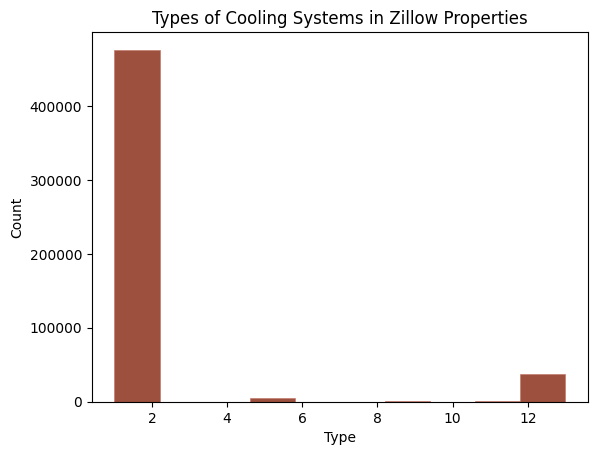

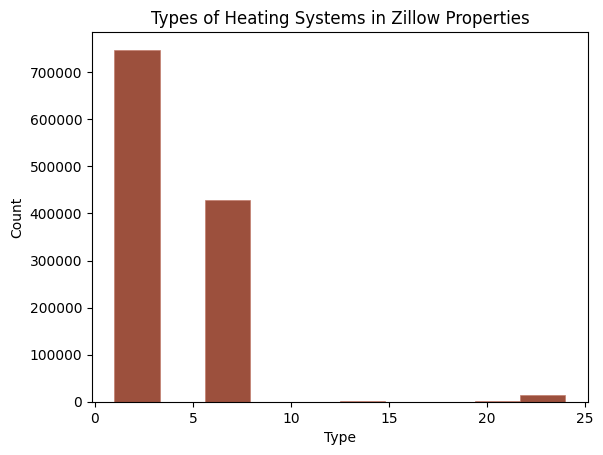

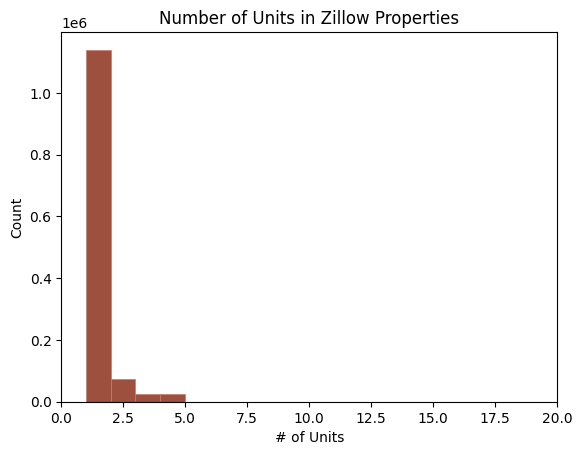

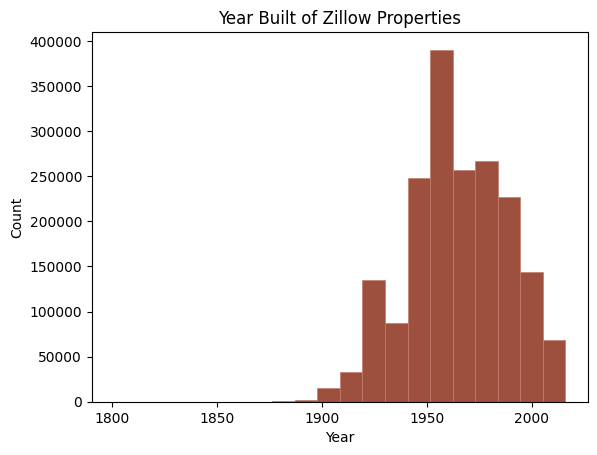

In [83]:
# plot airconditioningtypeid
plt.hist(X['airconditioningtypeid'], bins=10, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Types of Cooling Systems in Zillow Properties') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

# plot heatingorsystemtypeid
plt.hist(X['heatingorsystemtypeid'], bins=10, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Types of Heating Systems in Zillow Properties') 
plt.xlabel('Type') 
plt.ylabel('Count') 
plt.show()

# plot unitcnt
plt.hist(X['unitcnt'], bins=1000, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,20])
plt.title('Number of Units in Zillow Properties') 
plt.xlabel('# of Units') 
plt.ylabel('Count') 
plt.show()

# plot yearbuilt
plt.hist(X['yearbuilt'], bins=20, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Year Built of Zillow Properties') 
plt.xlabel('Year') 
plt.ylabel('Count') 
plt.show()

#### Correlation of Mode-Imputed Features with Price 

/var/folders/hd/l3cc346x2v93nv8mpvg27r400000gn/T/ipykernel_6031/283546058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_mode_vars_df["Price"] = Y


<AxesSubplot: >

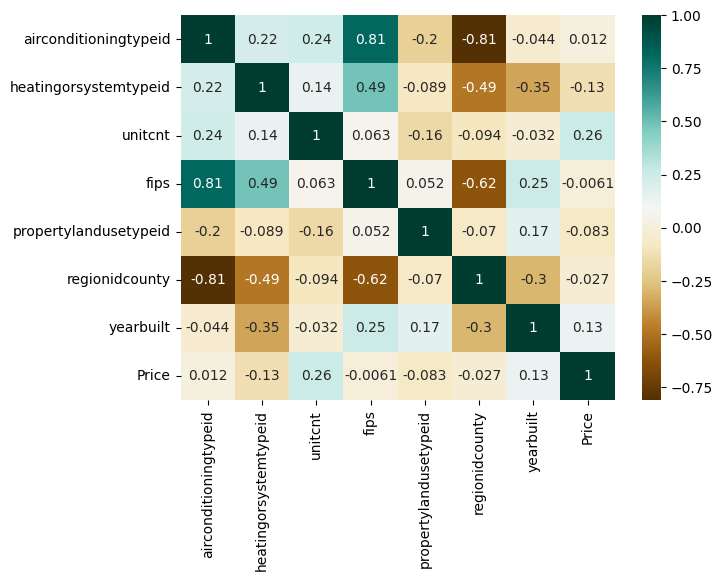

In [84]:
impute_mode_vars_df = X[["airconditioningtypeid", "heatingorsystemtypeid", "unitcnt", "fips", 
                    "propertylandusetypeid", "regionidcounty", "yearbuilt"]] 
impute_mode_vars_df["Price"] = Y

correlation = impute_mode_vars_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, cmap='BrBG', annot=True)

### Plot Median-Imputed Features


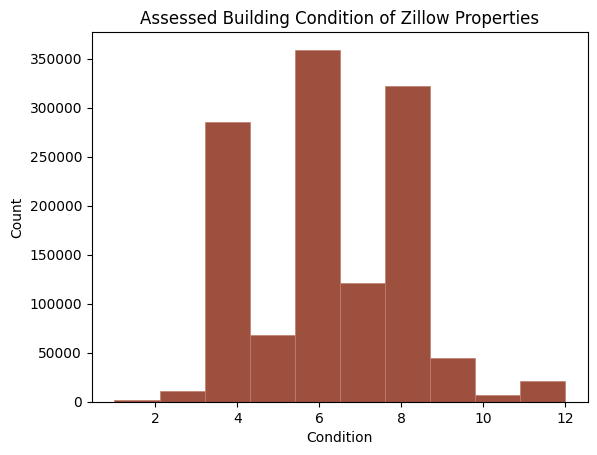

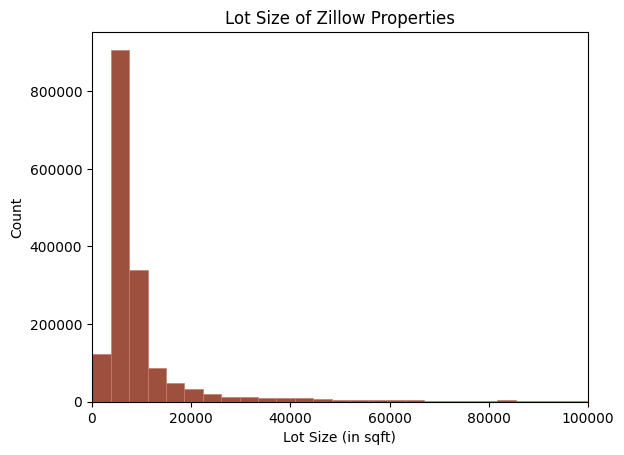

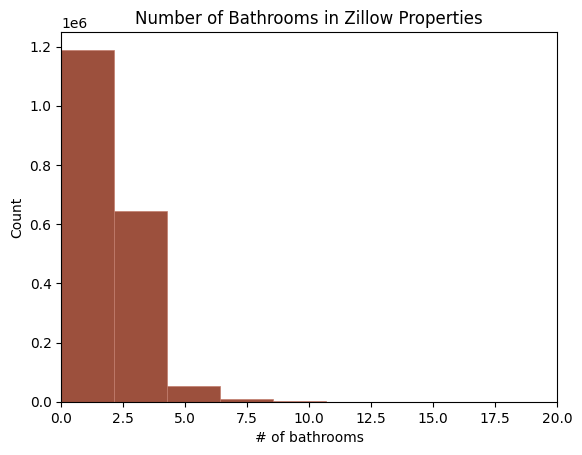

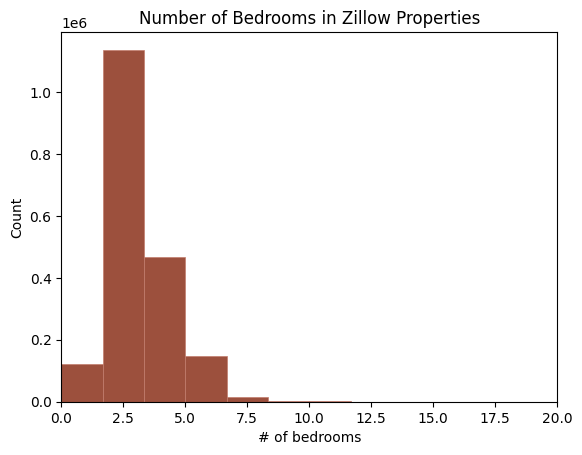

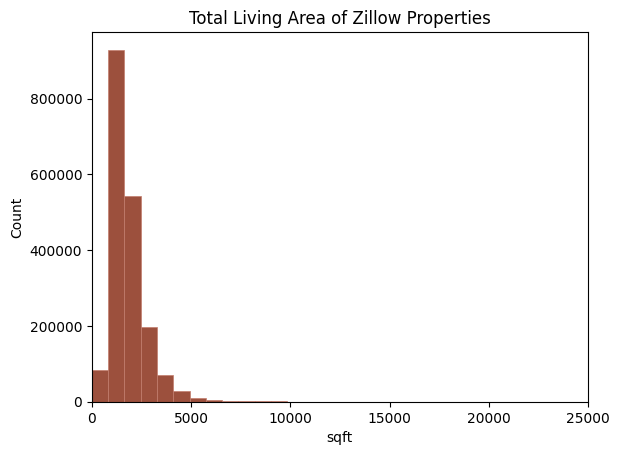

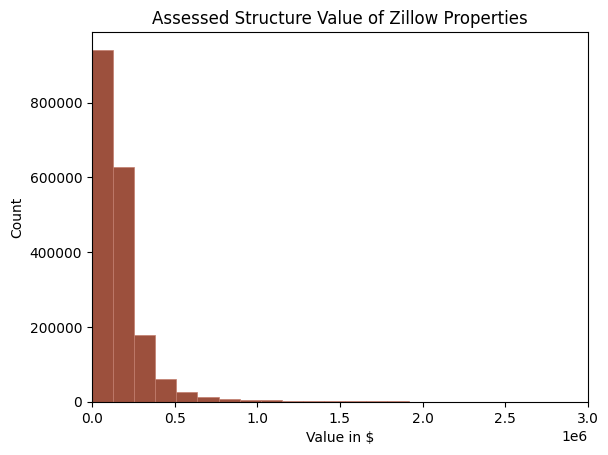

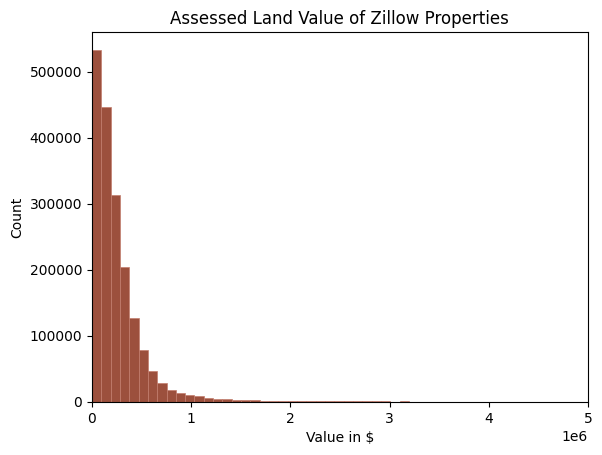

In [105]:
# plot buildingqualitytypeid
plt.hist(X['buildingqualitytypeid'], bins=10, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.title('Assessed Building Condition of Zillow Properties') 
plt.xlabel('Condition') 
plt.ylabel('Count') 
plt.show()

# plot lotsizesquarefeet
plt.hist(X['lotsizesquarefeet'], bins=100000, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,100000])
plt.title('Lot Size of Zillow Properties') 
plt.xlabel('Lot Size (in sqft)') 
plt.ylabel('Count') 
plt.show()

# plot bathroomcnt
plt.hist(X['bathroomcnt'], bins=15, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,20])
plt.title('Number of Bathrooms in Zillow Properties') 
plt.xlabel('# of bathrooms') 
plt.ylabel('Count') 
plt.show()

# plot bathroomcnt
plt.hist(X['bedroomcnt'], bins=15, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,20])
plt.title('Number of Bedrooms in Zillow Properties') 
plt.xlabel('# of bedrooms') 
plt.ylabel('Count') 
plt.show()

# plot calculatedfinishedsquarefeet
plt.hist(X['calculatedfinishedsquarefeet'], bins=1000, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,25000])
plt.title('Total Living Area of Zillow Properties') 
plt.xlabel('sqft') 
plt.ylabel('Count') 
plt.show()

# plot structuretaxvaluedollarcnt
plt.hist(X['structuretaxvaluedollarcnt'], bins=2000, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,3000000])
plt.title('Assessed Structure Value of Zillow Properties') 
plt.xlabel('Value in $') 
plt.ylabel('Count') 
plt.show()

# plot landtaxvaluedollarcnt
plt.hist(X['landtaxvaluedollarcnt'], bins=1000, facecolor = '#9c503d', edgecolor='#c27d6d', linewidth=0.5)
plt.xlim([0,5000000])
plt.title('Assessed Land Value of Zillow Properties') 
plt.xlabel('Value in $') 
plt.ylabel('Count') 
plt.show()

#### Correlation of Median-Imputed Features with Price 

/var/folders/hd/l3cc346x2v93nv8mpvg27r400000gn/T/ipykernel_6031/2066413473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impute_median_vars_df["Price"] = Y


<AxesSubplot: >

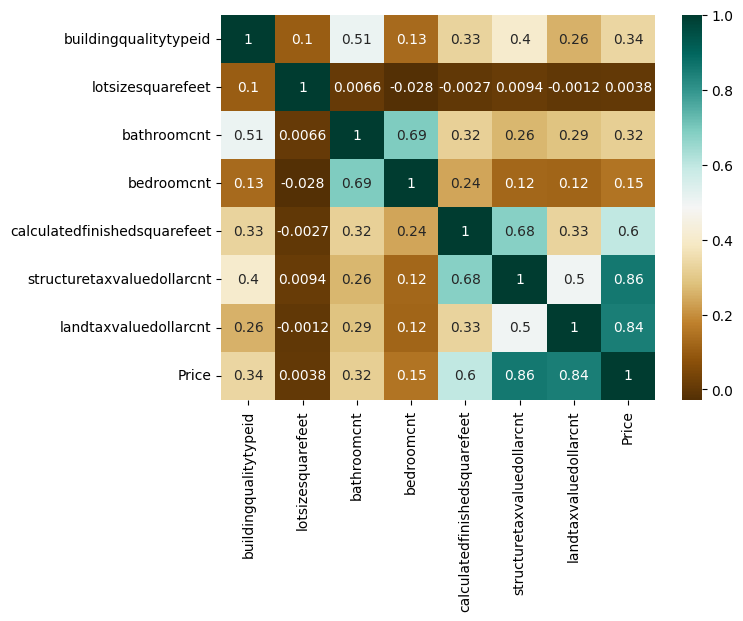

In [102]:
impute_median_vars_df = X[["buildingqualitytypeid", "lotsizesquarefeet", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                      "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt"]]
impute_median_vars_df["Price"] = Y

correlation = impute_median_vars_df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, cmap='BrBG', annot=True)

## Consider to impute some features by using multivariate imputation 

In [2]:
df = pd.read_csv('/accounts/grad/huz4/Desktop/STAT222/train_data.csv')

X = df.drop(['price'], axis =1)
Y = df['price']

In [3]:
drop_feat = ["finishedsquarefeet13", "finishedsquarefeet15", "finishedfloor1squarefeet", "finishedsquarefeet50",
             "storytypeid", "architecturalstyletypeid", "buildingclasstypeid", "typeconstructiontypeid", "finishedsquarefeet6",
             "pooltypeid10", "pooltypeid7", "hashottuborspa", "fireplaceflag", "threequarterbathnbr", "calculatedbathnbr",
             "fullbathcnt", "numberofstories", "rawcensustractandblock", "censustractandblock",
             "finishedsquarefeet12", "taxvaluedollarcnt", "taxamount", "assessmentyear", "roomcnt",
             "propertyzoningdesc", "regionidneighborhood", "regionidzip", "taxdelinquencyyear",
             "propertycountylandusecode", "regionidcity", "parcelid", "basementsqft", "yardbuildingsqft26", "latitude", "longitude"
            ]

In [4]:
X = X.drop(columns = drop_feat, axis =1)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


cat_impute_vars= ["airconditioningtypeid", 
                    "heatingorsystemtypeid", 
                    "fips", 
                    "propertylandusetypeid", 
                    "regionidcounty", 
                    "pooltypeid2", 
                    "decktypeid", 
                    "taxdelinquencyflag"] 
numeric_impute_vars = ["bathroomcnt", 
                   "bedroomcnt", 
                   "buildingqualitytypeid", 
                   "calculatedfinishedsquarefeet",
                  "fireplacecnt", 
                   "garagecarcnt", 
                   "garagetotalsqft",
                   "dist_to_dtla", 
                   "dist_to_ocean", 
                   "lotsizesquarefeet", 
                   "poolcnt",
                  "poolsizesum", 
                   "unitcnt", 
                   "yardbuildingsqft17",
                  "structuretaxvaluedollarcnt", 
                   "landtaxvaluedollarcnt",
                  "yearbuilt"]


multivariate_impute_pipe = ColumnTransformer([
        ("impute_cats", SimpleImputer(strategy="constant", fill_value='missing'), cat_impute_vars),
        ("impute_num", IterativeImputer(estimator=RandomForestRegressor(n_estimators=1, max_depth=30, min_samples_leaf=32), random_state=0, max_iter=1), numeric_impute_vars),
    ],
    remainder='passthrough'
)
X_mutil = multivariate_impute_pipe.fit_transform(X)

/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


array([['missing', 7.0, 6037.0, ..., 17031.0, 31246.0, 1950.0],
       ['missing', 2.0, 6037.0, ..., 110301.0, 45334.0, 1942.0],
       ['missing', 'missing', 6037.0, ..., 36110.01369863014,
        25508.910714285714, 1988.0],
       ...,
       ['missing', 'missing', 6059.0, ..., 194840.0, 266890.0, 1987.0],
       ['missing', 2.0, 6037.0, ..., 58795.0, 20474.0, 1956.0],
       ['missing', 'missing', 6059.0, ..., 55774.0, 181913.0, 1953.0]],
      dtype=object)